# Import modules and data

In [1]:
import pandas as pd
import numpy as np

pd.set_option('display.float_format', '{:.2f}'.format)

%matplotlib inline

In [2]:
taxi_df_full = pd.read_csv('./data/taxi.csv')

In [3]:
taxi_df_full.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1,2019-01-01 00:46:40,2019-01-01 00:53:20,1,1.50,1,N,151,239,1,7.00,0.50,0.50,1.65,0.00,0.30,9.95,NaN
1,1,2019-01-01 00:59:47,2019-01-01 01:18:59,1,2.60,1,N,239,246,1,14.00,0.50,0.50,1.00,0.00,0.30,16.30,NaN
2,2,2018-12-21 13:48:30,2018-12-21 13:52:40,3,0.00,1,N,236,236,1,4.50,0.50,0.50,0.00,0.00,0.30,5.80,NaN
3,2,2018-11-28 15:52:25,2018-11-28 15:55:45,5,0.00,1,N,193,193,2,3.50,0.50,0.50,0.00,0.00,0.30,7.55,NaN
4,2,2018-11-28 15:56:57,2018-11-28 15:58:33,5,0.00,2,N,193,193,2,52.00,0.00,0.50,0.00,0.00,0.30,55.55,NaN


In [4]:
taxi_df_full.shape

(7667792, 18)

# Summary


This Jupyter notebook focuses on predicting the average fare for taxi cab rides in New York during January using data on taxi cab fares from January 2019 (https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page). The notebook begins by using a benchmark decision tree model to predict fare prices, resulting in an r-squared value of approximately 0.2.

To improve the predictions, additional data on borough and weather conditions are incorporated into the dataset. Several models are then initialized and tuned using this augmented data. Among the models tested, the random forest regressor, gradient boost regressor, XGBoost regressor, and Cat Boost regressor demonstrate the best performance, achieving an r-squared value of approximately 0.4.

By utilizing the enhanced dataset and employing these selected models, this notebook provides more accurate predictions of taxi fare prices in New York during January.

# Data exploration

In [5]:
taxi_df_full.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge'],
      dtype='object')

### Selecting useful features

In [6]:
taxi_df = taxi_df_full[['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count',
                        'trip_distance', 'RatecodeID', 'PULocationID', 'DOLocationID', 
                        'payment_type', 'total_amount']]

In [7]:
taxi_df.isnull().sum()

tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
PULocationID             0
DOLocationID             0
payment_type             0
total_amount             0
dtype: int64

In [8]:
taxi_df.dtypes

tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count            int64
trip_distance            float64
RatecodeID                 int64
PULocationID               int64
DOLocationID               int64
payment_type               int64
total_amount             float64
dtype: object

### Overview of the data

array([[<AxesSubplot: title={'center': 'passenger_count'}>,
        <AxesSubplot: title={'center': 'trip_distance'}>,
        <AxesSubplot: title={'center': 'RatecodeID'}>],
       [<AxesSubplot: title={'center': 'PULocationID'}>,
        <AxesSubplot: title={'center': 'DOLocationID'}>,
        <AxesSubplot: title={'center': 'payment_type'}>],
       [<AxesSubplot: title={'center': 'total_amount'}>, <AxesSubplot: >,
        <AxesSubplot: >]], dtype=object)

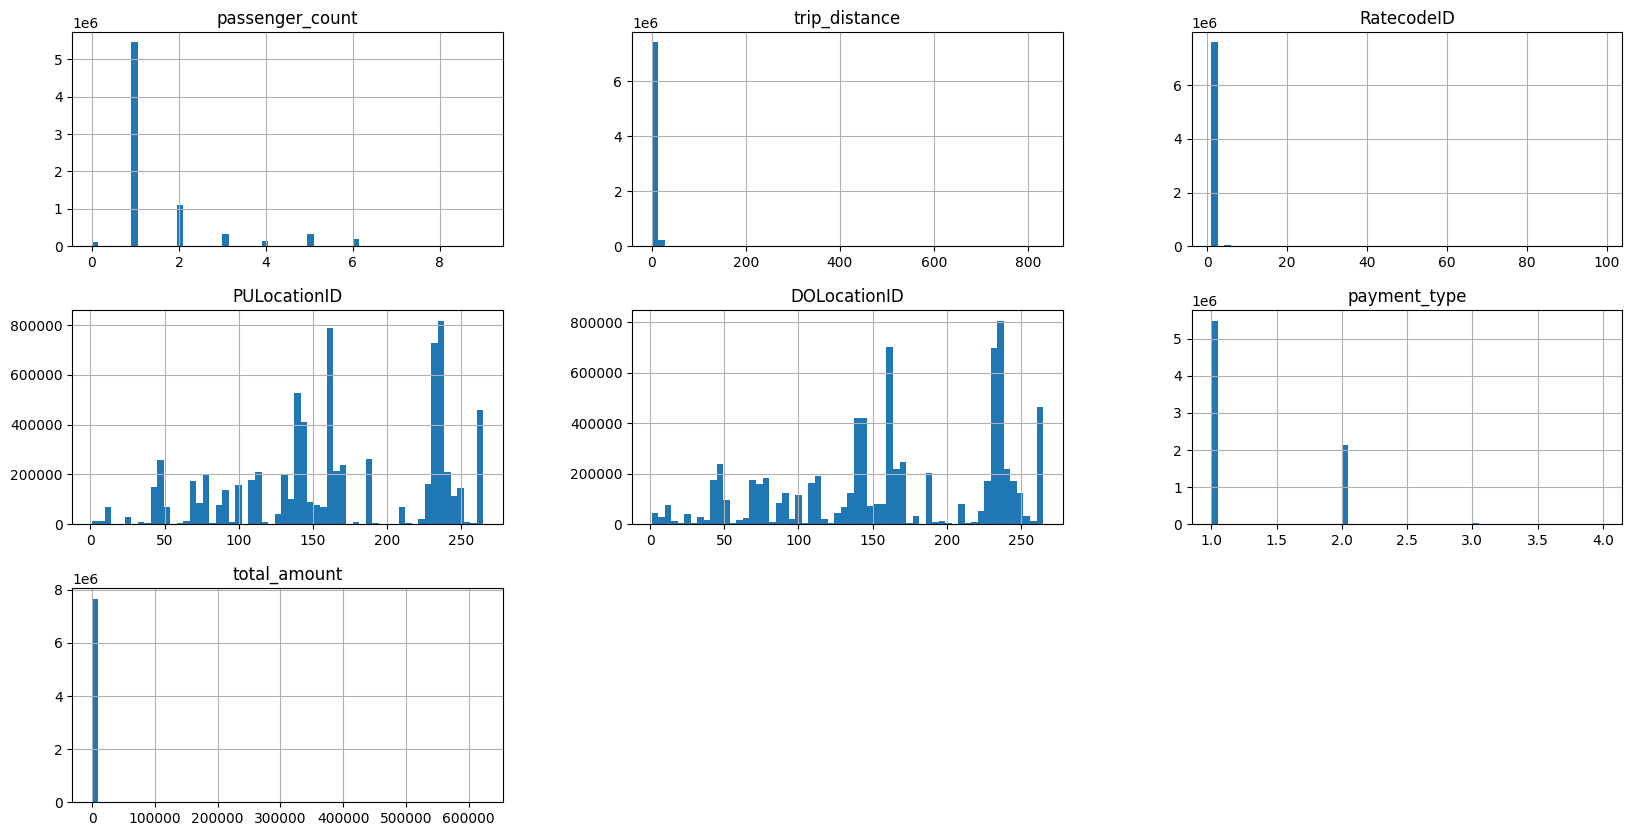

In [9]:
taxi_df.hist(figsize=(20,10), bins=60)

### Looking for anomalies in the data

<AxesSubplot: xlabel='index', ylabel='total_amount'>

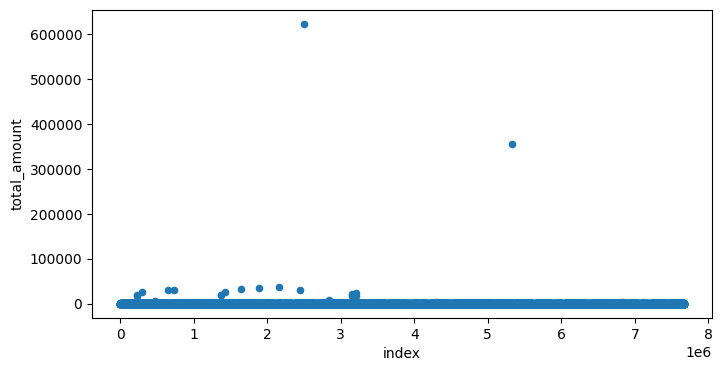

In [10]:
taxi_df.reset_index().plot(kind='scatter', y='total_amount', x='index', figsize=(8,4))

<AxesSubplot: xlabel='index', ylabel='total_amount'>

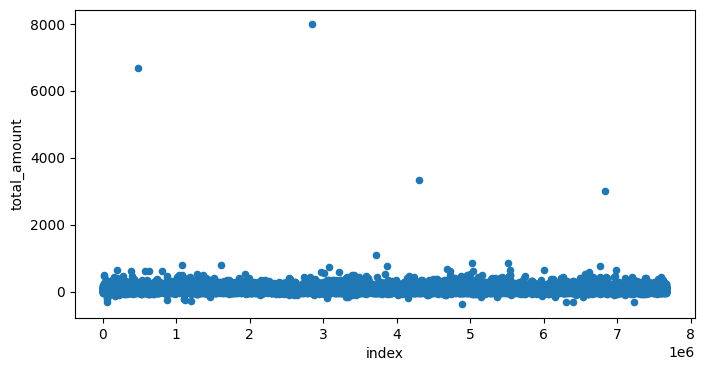

In [11]:
taxi_df[taxi_df['total_amount'] <= 15000].reset_index().plot(kind='scatter', y='total_amount', x='index', figsize=(8,4))

In [12]:
more_tran_1000 = taxi_df[taxi_df['total_amount'] > 1000].shape[0]
more_tran_500 = taxi_df[taxi_df['total_amount'] > 500].shape[0]
more_tran_300 = taxi_df[taxi_df['total_amount'] > 300].shape[0]
more_tran_200 = taxi_df[taxi_df['total_amount'] > 200].shape[0]
more_tran_100 = taxi_df[taxi_df['total_amount'] > 100].shape[0]

print(f'There are {more_tran_1000} entries where greater than $1000 was paid for the trip')
print(f'There are {more_tran_500} entries where greater than $500 was paid for the trip')
print(f'There are {more_tran_300} entries where greater than $300 was paid for the trip')
print(f'There are {more_tran_200} entries where greater than $200 was paid for the trip')
print(f'There are {more_tran_100} entries where greater than $100 was paid for the trip')

There are 23 entries where greater than $1000 was paid for the trip
There are 56 entries where greater than $500 was paid for the trip
There are 307 entries where greater than $300 was paid for the trip
There are 1166 entries where greater than $200 was paid for the trip
There are 10832 entries where greater than $100 was paid for the trip


<AxesSubplot: xlabel='index', ylabel='total_amount'>

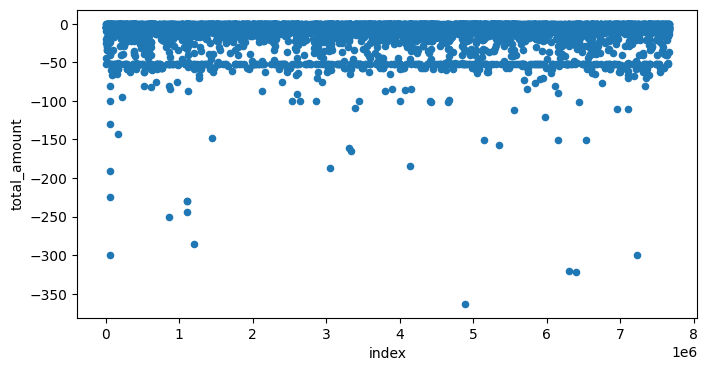

In [13]:
taxi_df[taxi_df['total_amount'] <= 0].reset_index().plot(kind='scatter', y='total_amount', x='index', figsize=(8,4))

In [14]:
zero_or_less = taxi_df[taxi_df['total_amount'] <= 0].shape[0]
print(f'Note:\nThere are {zero_or_less} entries where $0 or less was paid for the trip\n')

Note:
There are 8545 entries where $0 or less was paid for the trip



<AxesSubplot: >

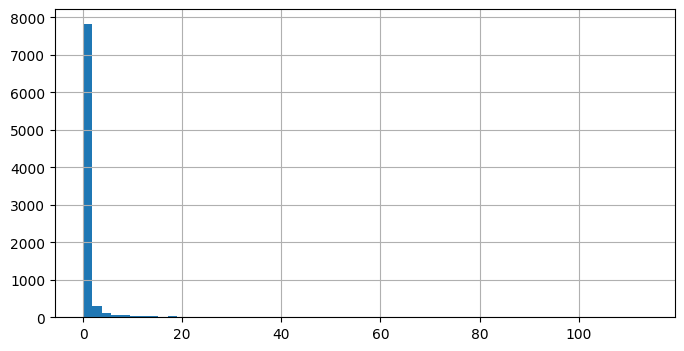

In [15]:
taxi_df[taxi_df['total_amount'] <= 0]['trip_distance'].hist(bins=60, figsize=(8,4))

### Conclusion: 

- Most trips where 0 dollars or less where paid appear to be where the trip was cancelled so this data can be discarded

- Using 300 dollars as a maximum cutoff for the trip cost seems reasonable to remove anomalously large data entries

- These filters will be applied in the next section - Data cleaning

# Data cleaning

In [16]:
taxi_df_filtered = taxi_df[(taxi_df['total_amount'] >= 0) & (taxi_df['total_amount'] < 300)]


In [17]:
print(taxi_df.shape)
taxi_df_filtered.shape

(7667792, 9)


(7660350, 9)

In [18]:
taxi_df_filtered.isna().sum()

tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
PULocationID             0
DOLocationID             0
payment_type             0
total_amount             0
dtype: int64

# Data Preparation

### Modifictions to the data
Some changes need to be made to the data to allow for it to be used for a benchmark model:

- The dates are currently strings so we need to change them to datetime data types

- The RatecodeID, PULocationID, DOLocationID and payment_type are integers so we need to convert them to strings

- We then need to extract the date, year, month, day, hour from the datetime objects we made and have them as their own indiviual columns

- We will group the data by the location and time, this will allow us to build a model that predicts the fare paid on a specific hour of a speicific day in a given location

In [19]:
taxi_df_prepared = taxi_df_filtered.copy()

In [20]:
taxi_df_prepared.dtypes

tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count            int64
trip_distance            float64
RatecodeID                 int64
PULocationID               int64
DOLocationID               int64
payment_type               int64
total_amount             float64
dtype: object

In [21]:
taxi_df_prepared['tpep_pickup_datetime'] = pd.to_datetime(taxi_df_prepared['tpep_pickup_datetime'])
taxi_df_prepared['tpep_dropoff_datetime'] = pd.to_datetime(taxi_df_prepared['tpep_dropoff_datetime'])

In [22]:
taxi_df_prepared.dtypes

tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                   int64
trip_distance                   float64
RatecodeID                        int64
PULocationID                      int64
DOLocationID                      int64
payment_type                      int64
total_amount                    float64
dtype: object

In [23]:
taxi_df_prepared['RatecodeID'] = taxi_df_prepared['RatecodeID'].astype(str)
taxi_df_prepared['PULocationID'] = taxi_df_prepared['PULocationID'].astype(str)
taxi_df_prepared['DOLocationID'] = taxi_df_prepared['DOLocationID'].astype(str)
taxi_df_prepared['payment_type'] = taxi_df_prepared['payment_type'].astype(str)

In [24]:
taxi_df_prepared.dtypes

tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                   int64
trip_distance                   float64
RatecodeID                       object
PULocationID                     object
DOLocationID                     object
payment_type                     object
total_amount                    float64
dtype: object

In [25]:
taxi_df_prepared.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
0,2019-01-01 00:46:40,2019-01-01 00:53:20,1,1.50,1,151,239,1,9.95
1,2019-01-01 00:59:47,2019-01-01 01:18:59,1,2.60,1,239,246,1,16.30
2,2018-12-21 13:48:30,2018-12-21 13:52:40,3,0.00,1,236,236,1,5.80
3,2018-11-28 15:52:25,2018-11-28 15:55:45,5,0.00,1,193,193,2,7.55
4,2018-11-28 15:56:57,2018-11-28 15:58:33,5,0.00,2,193,193,2,55.55


In [26]:
taxi_df_prepared['transaction_date'] = pd.to_datetime(taxi_df_prepared['tpep_pickup_datetime'].dt.date)
taxi_df_prepared['transaction_year'] = taxi_df_prepared['tpep_pickup_datetime'].dt.year
taxi_df_prepared['transaction_month'] = taxi_df_prepared['tpep_pickup_datetime'].dt.month
taxi_df_prepared['transaction_day'] = taxi_df_prepared['tpep_pickup_datetime'].dt.day
taxi_df_prepared['transaction_hour'] = taxi_df_prepared['tpep_pickup_datetime'].dt.hour

In [27]:
taxi_df_prepared.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount,transaction_date,transaction_year,transaction_month,transaction_day,transaction_hour
0,2019-01-01 00:46:40,2019-01-01 00:53:20,1,1.50,1,151,239,1,9.95,2019-01-01,2019,1,1,0
1,2019-01-01 00:59:47,2019-01-01 01:18:59,1,2.60,1,239,246,1,16.30,2019-01-01,2019,1,1,0
2,2018-12-21 13:48:30,2018-12-21 13:52:40,3,0.00,1,236,236,1,5.80,2018-12-21,2018,12,21,13
3,2018-11-28 15:52:25,2018-11-28 15:55:45,5,0.00,1,193,193,2,7.55,2018-11-28,2018,11,28,15
4,2018-11-28 15:56:57,2018-11-28 15:58:33,5,0.00,2,193,193,2,55.55,2018-11-28,2018,11,28,15


array([[<AxesSubplot: title={'center': 'tpep_pickup_datetime'}>,
        <AxesSubplot: title={'center': 'tpep_dropoff_datetime'}>,
        <AxesSubplot: title={'center': 'passenger_count'}>],
       [<AxesSubplot: title={'center': 'trip_distance'}>,
        <AxesSubplot: title={'center': 'total_amount'}>,
        <AxesSubplot: title={'center': 'transaction_date'}>],
       [<AxesSubplot: title={'center': 'transaction_year'}>,
        <AxesSubplot: title={'center': 'transaction_month'}>,
        <AxesSubplot: title={'center': 'transaction_day'}>],
       [<AxesSubplot: title={'center': 'transaction_hour'}>,
        <AxesSubplot: >, <AxesSubplot: >]], dtype=object)

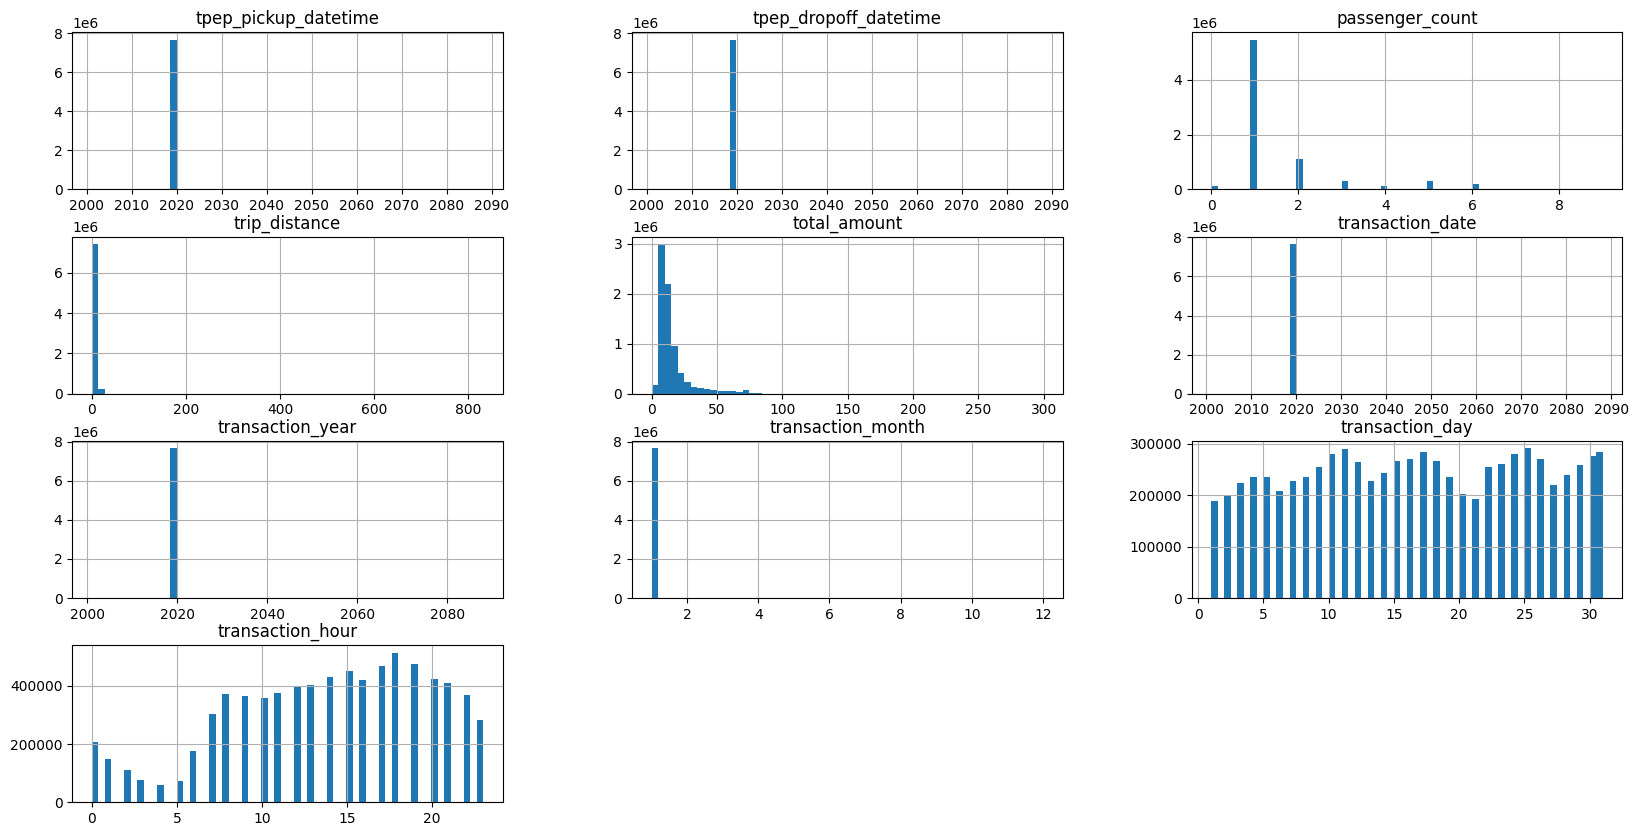

In [28]:
taxi_df_prepared.hist(figsize=(20,10), bins=60)

In [29]:
taxi_df_prepared = taxi_df_prepared[taxi_df_prepared['transaction_year'] == 2019]
taxi_df_prepared = taxi_df_prepared[taxi_df_prepared['transaction_month'] == 1]

In [30]:
categorical_columns = ['PULocationID', 'transaction_date', 'transaction_month', 'transaction_day', 'transaction_hour']
numerical_columns = ['trip_distance', 'total_amount']
all_needed_columns =  categorical_columns + numerical_columns

In [31]:
main_taxi_df = taxi_df_prepared[all_needed_columns]
print(main_taxi_df.shape)
main_taxi_df.head()

(7659814, 7)


,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount
0,151,2019-01-01,1,1,0,1.50,9.95
1,239,2019-01-01,1,1,0,2.60,16.30
7,163,2019-01-01,1,1,0,1.30,9.05
8,229,2019-01-01,1,1,0,3.70,18.50
9,141,2019-01-01,1,1,0,2.10,13.00


In [42]:
taxi_grouped_by_region = main_taxi_df.groupby(categorical_columns).mean().reset_index()
taxi_grouped_by_region['count_of_transactions'] =  main_taxi_df.groupby(categorical_columns).count().reset_index()['total_amount']
taxi_grouped_by_region.head()

,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transactions
0,1,2019-01-01,1,1,2,0.00,21.80,1
1,1,2019-01-01,1,1,5,0.00,87.30,1
2,1,2019-01-01,1,1,6,0.00,80.30,1
3,1,2019-01-01,1,1,8,0.00,128.58,2
4,1,2019-01-01,1,1,10,16.90,43.25,4


<AxesSubplot: >

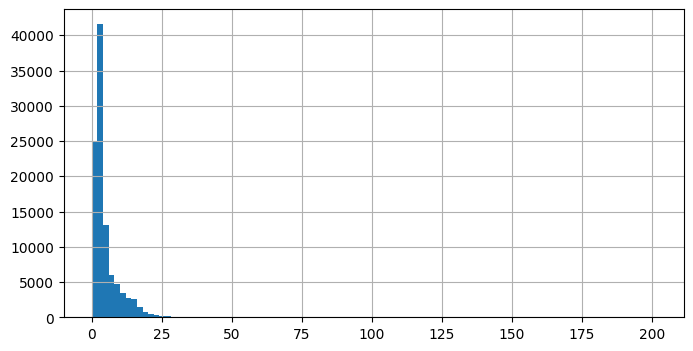

In [33]:
taxi_grouped_by_region['trip_distance'].hist(bins=100,figsize=(8,4))

<AxesSubplot: >

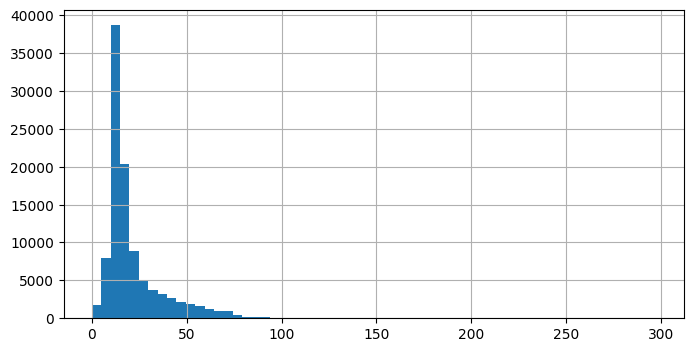

In [34]:
taxi_grouped_by_region['total_amount'].hist(bins=60, figsize=(8,4))

# Benchmark Model

### Decision tree regressor

Here we will build a decision tree regressor model to build a model based on the data we have, we will then use the metrics from this model as the benchmark to try and impove on wih future models

In [35]:
data_for_benchmark_model = taxi_grouped_by_region.copy()

In [36]:
categorical_features_benchmark = ['PULocationID', 'transaction_month', 'transaction_day', 'transaction_hour']
input_features_benchmark = categorical_features_benchmark + ['trip_distance']
target_feature_benchmark = 'total_amount'

In [37]:
from sklearn.model_selection  import train_test_split

X_bench = data_for_benchmark_model[categorical_features_benchmark]
y_bench = data_for_benchmark_model[target_feature_benchmark]

X_bench = pd.get_dummies(X_bench)

X_train_b, X_test_b, y_train_b,  y_test_b = train_test_split(X_bench, y_bench, test_size=0.33, random_state=42)


In [1]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(max_depth=10)

tree.fit(X_train_b, y_train_b)


In [198]:
model_at_hand = tree

y_predict_benchmark = model_at_hand.predict(X_test_b)

In [199]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

print('mean absolute error = ', mean_absolute_error(y_test_b, y_predict_benchmark))
print('mean squared error = ', mean_squared_error(y_test_b, y_predict_benchmark))
print('root mean square error = ', sqrt(mean_squared_error(y_test_b, y_predict_benchmark)))
print('r2 score = ', r2_score(y_test_b, y_predict_benchmark))


mean absolute error =  9.988524847150979
mean squared error =  235.66462836082337
root mean square error =  15.35137219797707
r2 score =  0.1930055923265418


<AxesSubplot: xlabel='true', ylabel='pred'>

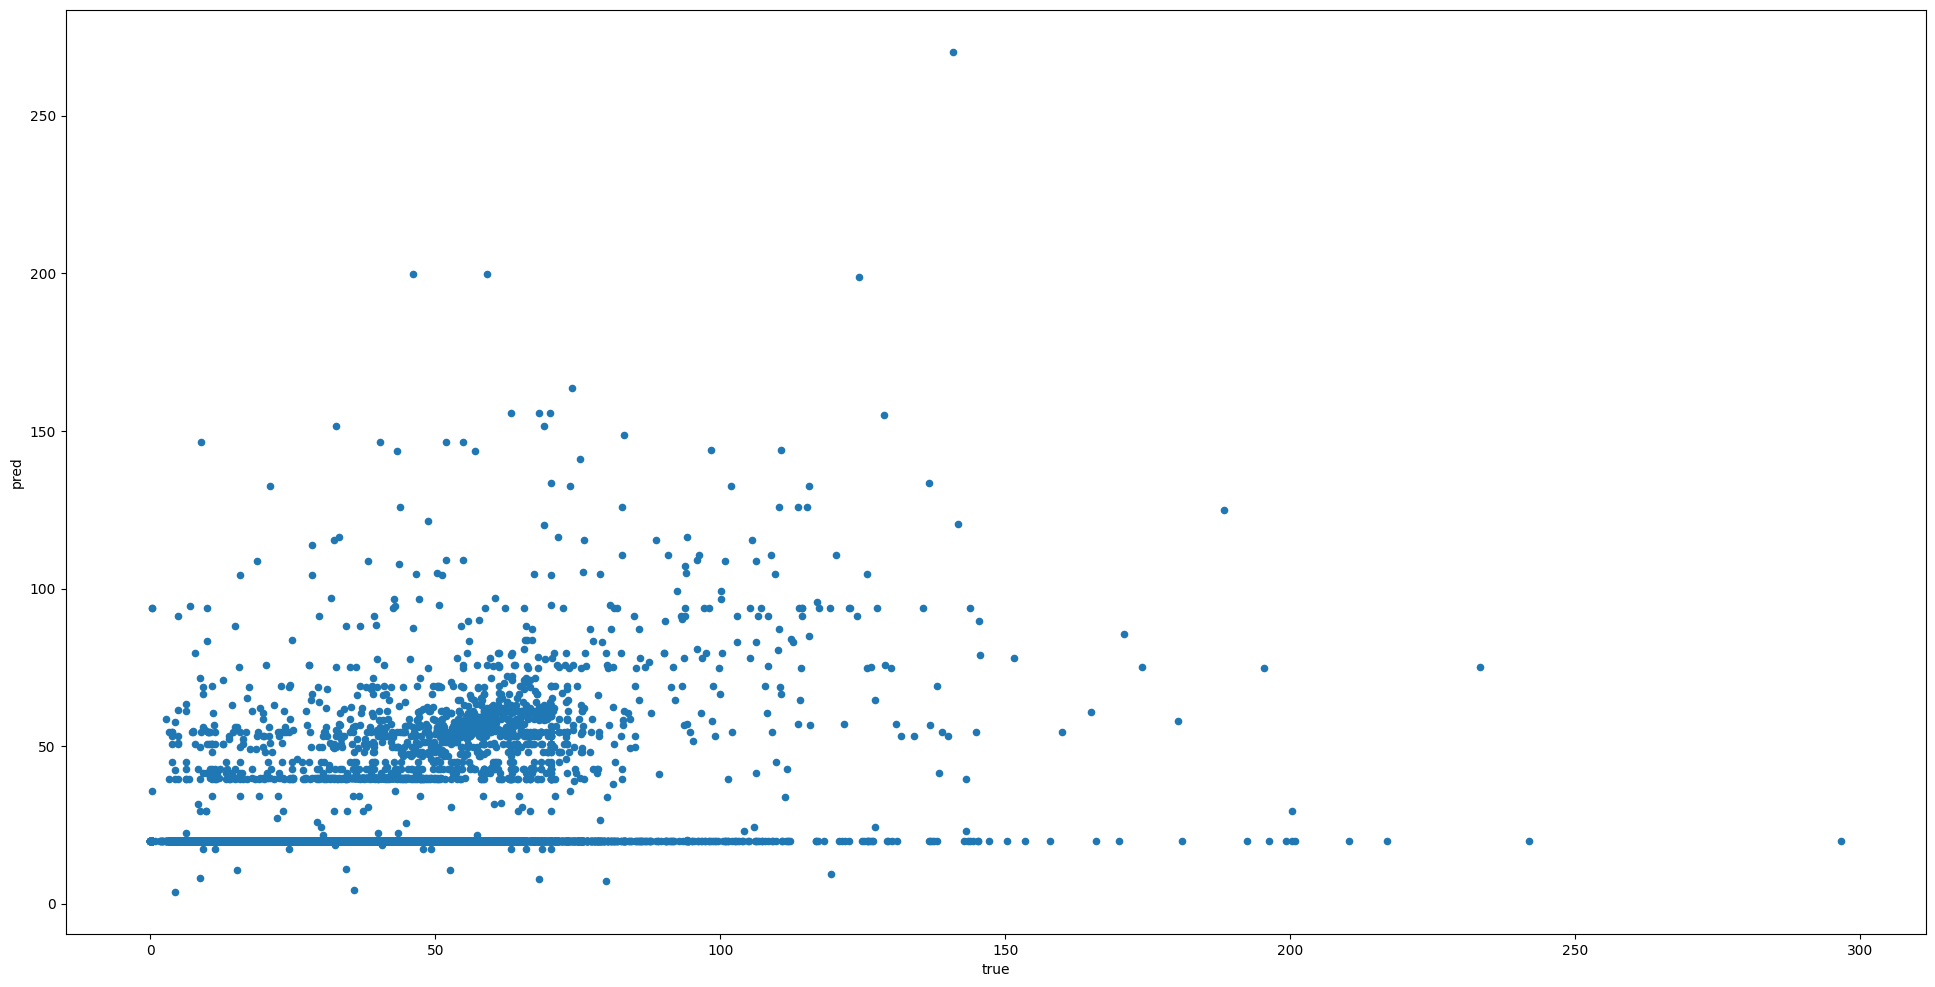

In [41]:
data = {'true': y_test_b, 'pred': y_predict_b}
results = pd.DataFrame(data)

results.plot(kind='scatter', x='true', y='pred', figsize=(24,12))

### Conclusion

The r-squared vaue for our model is 0.193, this is relatively bad and we will use feature engineering, hyperparameter tuning and model selection to try and improve upon it

# Feature engineering

### Modificaions to be made

- Insert a column specifying whether a given day is weekday or weekend
- Insert a column specifying whether a given day is holiday
- Insert a column specifying which borough of New York each pickup location is in
- Add several columns relating to the whether on a given day
- For entries where there is no whether information the interpolate method will use to fill in the gaps

In [50]:
data_with_new_features = taxi_grouped_by_region.copy()

In [51]:
data_with_new_features['transaction_week_day'] = data_with_new_features['transaction_date'].dt.weekday
data_with_new_features['weekend']  = data_with_new_features['transaction_week_day'].apply(lambda x: True if x == 5 or x == 6 else False)

In [52]:
data_with_new_features.head()

,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transactions,transaction_week_day,weekend
0,1,2019-01-01,1,1,2,0.00,21.80,1,1,False
1,1,2019-01-01,1,1,5,0.00,87.30,1,1,False
2,1,2019-01-01,1,1,6,0.00,80.30,1,1,False
3,1,2019-01-01,1,1,8,0.00,128.58,2,1,False
4,1,2019-01-01,1,1,10,16.90,43.25,4,1,False


In [53]:
from pandas.tseries.holiday import USFederalHolidayCalendar

cal = USFederalHolidayCalendar()
holidays = cal.holidays(start='2018',end='2020').date
print(holidays)

[datetime.date(2018, 1, 1) datetime.date(2018, 1, 15)
 datetime.date(2018, 2, 19) datetime.date(2018, 5, 28)
 datetime.date(2018, 7, 4) datetime.date(2018, 9, 3)
 datetime.date(2018, 10, 8) datetime.date(2018, 11, 12)
 datetime.date(2018, 11, 22) datetime.date(2018, 12, 25)
 datetime.date(2019, 1, 1) datetime.date(2019, 1, 21)
 datetime.date(2019, 2, 18) datetime.date(2019, 5, 27)
 datetime.date(2019, 7, 4) datetime.date(2019, 9, 2)
 datetime.date(2019, 10, 14) datetime.date(2019, 11, 11)
 datetime.date(2019, 11, 28) datetime.date(2019, 12, 25)
 datetime.date(2020, 1, 1)]


In [54]:
data_with_new_features['is_holiday'] = data_with_new_features['transaction_date'].isin(holidays)
data_with_new_features.head()

,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transactions,transaction_week_day,weekend,is_holiday
0,1,2019-01-01,1,1,2,0.00,21.80,1,1,False,True
1,1,2019-01-01,1,1,5,0.00,87.30,1,1,False,True
2,1,2019-01-01,1,1,6,0.00,80.30,1,1,False,True
3,1,2019-01-01,1,1,8,0.00,128.58,2,1,False,True
4,1,2019-01-01,1,1,10,16.90,43.25,4,1,False,True


In [55]:
zone_lookup = pd.read_csv('data/taxi_zone_lookup.csv')
print(zone_lookup.columns)
print(zone_lookup.dtypes)

Index(['LocationID', 'Borough', 'Zone', 'service_zone'], dtype='object')
LocationID       int64
Borough         object
Zone            object
service_zone    object
dtype: object


In [56]:
zone_lookup['LocationID'] = zone_lookup['LocationID'].astype(str)
zone_lookup = zone_lookup[['LocationID', 'Borough']]
print(zone_lookup.dtypes)
zone_lookup.head(10)

LocationID    object
Borough       object
dtype: object


,LocationID,Borough
0,1,EWR
1,2,Queens
2,3,Bronx
3,4,Manhattan
4,5,Staten Island
5,6,Staten Island
6,7,Queens
7,8,Queens
8,9,Queens
9,10,Queens


In [57]:
data_with_new_features = data_with_new_features.merge(zone_lookup, left_on='PULocationID', right_on='LocationID', how='left')
data_with_new_features.drop('LocationID', axis=1, inplace=True)

In [58]:
data_with_new_features['Borough'].value_counts()

Manhattan        45310
Brooklyn         23639
Queens           22029
Bronx             9589
Unknown           1457
Staten Island      306
EWR                271
Name: Borough, dtype: int64

# Adding weather features

In [59]:
nyc_weather = pd.read_csv('data/nyc_weather.csv')
nyc_weather.head()

,date and time,temperature,humidity,wind speed,cloud cover,amount of precipitation
0,31.12.2019 22:00,6.10,65,6,100%.,0.3
1,31.12.2019 19:00,6.70,71,5,70 – 80%.,NaN
2,31.12.2019 16:00,7.20,66,5,50%.,NaN
3,31.12.2019 13:00,6.10,76,3,100%.,Trace of precipitation
4,31.12.2019 10:00,4.40,83,2,100%.,Trace of precipitation


In [60]:
nyc_weather.shape

(2936, 6)

In [61]:
nyc_weather.dtypes

date and time               object
temperature                float64
humidity                     int64
wind speed                   int64
cloud cover                 object
amount of precipitation     object
dtype: object

In [62]:
nyc_weather['cloud cover'].value_counts()

70 – 80%.                                                     973
100%.                                                         896
20–30%.                                                       479
50%.                                                          413
no clouds                                                     168
Sky obscured by fog and/or other meteorological phenomena.      3
Name: cloud cover, dtype: int64

In [63]:
nyc_weather['amount of precipitation'].value_counts()

Trace of precipitation    266
0.3                        61
2.0                        49
1.0                        45
0.5                        42
0.8                        42
4.0                        33
5.0                        24
3.0                        23
6.0                        19
7.0                        13
8.0                        13
9.0                        11
10.0                       10
13.0                        7
12.0                        7
15.0                        6
11.0                        5
16.0                        3
22.0                        2
14.0                        2
29.0                        2
63.0                        1
21.0                        1
68.0                        1
17.0                        1
20.0                        1
30.0                        1
35.0                        1
34.0                        1
24.0                        1
18.0                        1
25.0                        1
Name: amou

In [64]:
nyc_weather.isna().sum()

date and time                 0
temperature                   0
humidity                      0
wind speed                    0
cloud cover                   4
amount of precipitation    2240
dtype: int64

In [65]:
nyc_weather['amount of precipitation'] = nyc_weather['amount of precipitation'].replace('Trace of precipitation', 0.1)
nyc_weather['amount of precipitation'] = nyc_weather['amount of precipitation'].astype(float)
nyc_weather['amount of precipitation'].interpolate(inplace=True)


In [66]:
nyc_weather['cloud cover'] = nyc_weather['cloud cover'].replace('70 – 80%.', 0.7)
nyc_weather['cloud cover'] = nyc_weather['cloud cover'].replace('100%.', 1)
nyc_weather['cloud cover'] = nyc_weather['cloud cover'].replace('20–30%.', 0.3)
nyc_weather['cloud cover'] = nyc_weather['cloud cover'].replace('50%.', 0.5)
nyc_weather['cloud cover'] = nyc_weather['cloud cover'].replace('no clouds', 0)
nyc_weather['cloud cover'] = nyc_weather['cloud cover'].replace('Sky obscured by fog and/or other meteorological phenomena.', 1)
nyc_weather['cloud cover'] = nyc_weather['cloud cover'].astype(float)
nyc_weather['cloud cover'].interpolate(inplace=True)

In [67]:
nyc_weather.dtypes

date and time               object
temperature                float64
humidity                     int64
wind speed                   int64
cloud cover                float64
amount of precipitation    float64
dtype: object

In [68]:
nyc_weather['date and time'] = pd.to_datetime(nyc_weather['date and time'])
nyc_weather['hour'] = nyc_weather['date and time'].dt.hour
nyc_weather['month'] = nyc_weather['date and time'].dt.month
nyc_weather['day'] = nyc_weather['date and time'].dt.day

In [69]:
nyc_weather.head()

,date and time,temperature,humidity,wind speed,cloud cover,amount of precipitation,hour,month,day
0,2019-12-31 22:00:00,6.10,65,6,1.00,0.30,22,12,31
1,2019-12-31 19:00:00,6.70,71,5,0.70,0.23,19,12,31
2,2019-12-31 16:00:00,7.20,66,5,0.50,0.17,16,12,31
3,2019-12-31 13:00:00,6.10,76,3,1.00,0.10,13,12,31
4,2019-12-31 10:00:00,4.40,83,2,1.00,0.10,10,12,31


In [70]:
data_with_new_features.head()

,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transactions,transaction_week_day,weekend,is_holiday,Borough
0,1,2019-01-01,1,1,2,0.00,21.80,1,1,False,True,EWR
1,1,2019-01-01,1,1,5,0.00,87.30,1,1,False,True,EWR
2,1,2019-01-01,1,1,6,0.00,80.30,1,1,False,True,EWR
3,1,2019-01-01,1,1,8,0.00,128.58,2,1,False,True,EWR
4,1,2019-01-01,1,1,10,16.90,43.25,4,1,False,True,EWR


In [80]:
nyc_taxi_with_weather = data_with_new_features.merge(nyc_weather, left_on = ['transaction_month','transaction_day','transaction_hour'], right_on = ['month','day','hour'], how='left')

print(nyc_taxi_with_weather.shape)
nyc_taxi_with_weather.head()

(102601, 21)


,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transactions,transaction_week_day,weekend,...,Borough,date and time,temperature,humidity,wind speed,cloud cover,amount of precipitation,hour,month,day
0,1,2019-01-01,1,1,2,0.00,21.80,1,1,False,...,EWR,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2019-01-01,1,1,5,0.00,87.30,1,1,False,...,EWR,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,2019-01-01,1,1,6,0.00,80.30,1,1,False,...,EWR,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,2019-01-01,1,1,8,0.00,128.58,2,1,False,...,EWR,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,2019-01-01,1,1,10,16.90,43.25,4,1,False,...,EWR,2019-01-01 10:00:00,15.60,62.00,11.00,0.70,0.47,10.00,1.00,1.00


In [81]:
nyc_taxi_with_weather = nyc_taxi_with_weather.drop(['date and time','hour','month','day'], axis=1)

In [82]:
print(nyc_taxi_with_weather.shape)
nyc_taxi_with_weather.head()

(102601, 17)


,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transactions,transaction_week_day,weekend,is_holiday,Borough,temperature,humidity,wind speed,cloud cover,amount of precipitation
0,1,2019-01-01,1,1,2,0.00,21.80,1,1,False,True,EWR,NaN,NaN,NaN,NaN,NaN
1,1,2019-01-01,1,1,5,0.00,87.30,1,1,False,True,EWR,NaN,NaN,NaN,NaN,NaN
2,1,2019-01-01,1,1,6,0.00,80.30,1,1,False,True,EWR,NaN,NaN,NaN,NaN,NaN
3,1,2019-01-01,1,1,8,0.00,128.58,2,1,False,True,EWR,NaN,NaN,NaN,NaN,NaN
4,1,2019-01-01,1,1,10,16.90,43.25,4,1,False,True,EWR,15.60,62.00,11.00,0.70,0.47


In [83]:
nyc_taxi_with_weather.isna().sum()

PULocationID                   0
transaction_date               0
transaction_month              0
transaction_day                0
transaction_hour               0
trip_distance                  0
total_amount                   0
count_of_transactions          0
transaction_week_day           0
weekend                        0
is_holiday                     0
Borough                        0
temperature                68406
humidity                   68406
wind speed                 68406
cloud cover                68406
amount of precipitation    68406
dtype: int64

In [84]:
nyc_taxi_with_weather.dtypes

PULocationID                       object
transaction_date           datetime64[ns]
transaction_month                   int64
transaction_day                     int64
transaction_hour                    int64
trip_distance                     float64
total_amount                      float64
count_of_transactions               int64
transaction_week_day                int64
weekend                              bool
is_holiday                           bool
Borough                            object
temperature                       float64
humidity                          float64
wind speed                        float64
cloud cover                       float64
amount of precipitation           float64
dtype: object

In [85]:
nyc_taxi_with_weather = nyc_taxi_with_weather.sort_values(['transaction_date','transaction_hour']).reset_index().drop('index',axis=1)


In [86]:
nyc_taxi_with_weather.head()

,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transactions,transaction_week_day,weekend,is_holiday,Borough,temperature,humidity,wind speed,cloud cover,amount of precipitation
0,10,2019-01-01,1,1,0,3.02,14.30,2,1,False,True,Queens,NaN,NaN,NaN,NaN,NaN
1,100,2019-01-01,1,1,0,2.80,18.13,54,1,False,True,Manhattan,NaN,NaN,NaN,NaN,NaN
2,106,2019-01-01,1,1,0,2.59,15.37,3,1,False,True,Brooklyn,NaN,NaN,NaN,NaN,NaN
3,107,2019-01-01,1,1,0,2.44,14.90,421,1,False,True,Manhattan,NaN,NaN,NaN,NaN,NaN
4,11,2019-01-01,1,1,0,1.79,9.30,2,1,False,True,Brooklyn,NaN,NaN,NaN,NaN,NaN


In [87]:
nyc_taxi_with_weather['temperature'] = nyc_taxi_with_weather['temperature'].interpolate()
nyc_taxi_with_weather['humidity'] = nyc_taxi_with_weather['humidity'].interpolate()
nyc_taxi_with_weather['wind speed'] = nyc_taxi_with_weather['wind speed'].interpolate()
nyc_taxi_with_weather['cloud cover'] = nyc_taxi_with_weather['cloud cover'].interpolate()
nyc_taxi_with_weather['amount of precipitation'] = nyc_taxi_with_weather['amount of precipitation'].interpolate()
nyc_taxi_with_weather = nyc_taxi_with_weather.fillna(method='bfill')

nyc_taxi_with_weather.isna().sum()

PULocationID               0
transaction_date           0
transaction_month          0
transaction_day            0
transaction_hour           0
trip_distance              0
total_amount               0
count_of_transactions      0
transaction_week_day       0
weekend                    0
is_holiday                 0
Borough                    0
temperature                0
humidity                   0
wind speed                 0
cloud cover                0
amount of precipitation    0
dtype: int64

In [88]:
nyc_taxi_with_weather.head()

,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transactions,transaction_week_day,weekend,is_holiday,Borough,temperature,humidity,wind speed,cloud cover,amount of precipitation
0,10,2019-01-01,1,1,0,3.02,14.30,2,1,False,True,Queens,8.30,97.00,0.00,1.00,29.00
1,100,2019-01-01,1,1,0,2.80,18.13,54,1,False,True,Manhattan,8.30,97.00,0.00,1.00,29.00
2,106,2019-01-01,1,1,0,2.59,15.37,3,1,False,True,Brooklyn,8.30,97.00,0.00,1.00,29.00
3,107,2019-01-01,1,1,0,2.44,14.90,421,1,False,True,Manhattan,8.30,97.00,0.00,1.00,29.00
4,11,2019-01-01,1,1,0,1.79,9.30,2,1,False,True,Brooklyn,8.30,97.00,0.00,1.00,29.00


# Model Training

### Data preparation

The relevent features and the target variable are selected and the get_dummies method is used to prepare categorical features for use with the models

In [89]:
data_for_model = nyc_taxi_with_weather.copy()

In [90]:
categorical_features = ['PULocationID', 'transaction_month', 'transaction_day', 
                       'transaction_hour', 'transaction_week_day', 'weekend', 'is_holiday', 'Borough']
input_features = categorical_features + ['temperature', 'humidity', 'wind speed', 'cloud cover', 'amount of precipitation']

target_feature = 'total_amount'

In [91]:
X = data_for_model[input_features]
y = data_for_model[target_feature]

X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [92]:
X_train.head()

,transaction_month,transaction_day,transaction_hour,transaction_week_day,weekend,is_holiday,temperature,humidity,wind speed,cloud cover,...,PULocationID_97,PULocationID_98,PULocationID_99,Borough_Bronx,Borough_Brooklyn,Borough_EWR,Borough_Manhattan,Borough_Queens,Borough_Staten Island,Borough_Unknown
98422,1,30,16,2,False,False,-2.20,78.00,12.00,1.00,...,0,0,0,0,0,0,0,1,0,0
45614,1,14,15,0,False,False,0.40,41.51,4.66,0.30,...,0,0,0,1,0,0,0,0,0,0
36700,1,11,22,4,False,False,7.20,52.00,6.00,0.00,...,0,0,0,0,0,0,1,0,0,0
36937,1,12,0,5,True,False,2.33,44.62,4.52,0.52,...,0,0,0,0,0,0,0,1,0,0
78690,1,24,18,3,False,False,7.83,72.95,8.62,0.70,...,0,0,0,0,0,0,1,0,0,0


# Decision Tree

In [2]:
from sklearn.tree import DecisionTreeRegressor 

decision_tree = DecisionTreeRegressor(max_depth=10)
decision_tree.fit(X_train, y_train)


In [200]:
current_model = decision_tree
y_pred = current_model.predict(X_test)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

print('mean_absolute_error: ', mean_absolute_error(y_test, y_pred))
print('mean_squared_error: ', mean_squared_error(y_test, y_pred))
print('root_mean_squared_error: ', sqrt(mean_squared_error(y_test, y_pred)))
print('r2_score: ', r2_score(y_test, y_pred))


mean_absolute_error:  8.797559682597003
mean_squared_error:  223.2267577420586
root_mean_squared_error:  14.94077500473314
r2_score:  0.2691755338390238


<AxesSubplot: xlabel='actual', ylabel='predicted'>

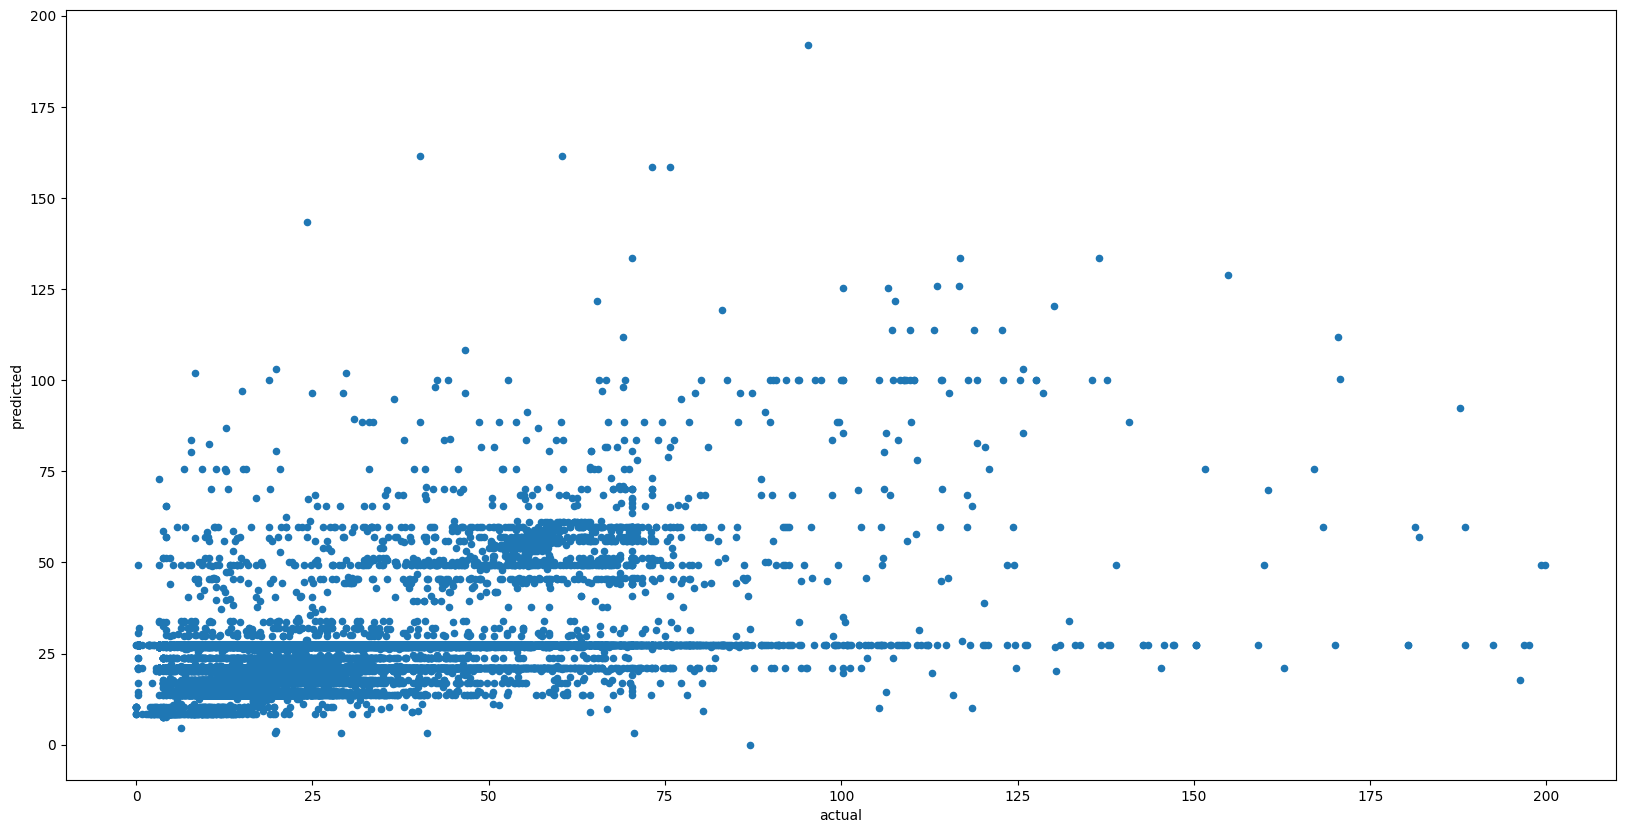

In [98]:
data = {'actual': y_test, 'predicted': y_pred}
results = pd.DataFrame(data)
results.plot(kind='scatter', x='actual', y='predicted', figsize=(20,10))

# Random Forrest

In [1]:
from sklearn.ensemble import RandomForestRegressor

rando_model = RandomForestRegressor()
rando_model.fit(X_train, y_train)

In [96]:
current_model = rando_model
y_pred = rando_model.predict(X_test)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

print('mean_absolute_error: ', mean_absolute_error(y_test, y_pred))
print('mean_squared_error: ', mean_squared_error(y_test, y_pred))
print('root_mean_squared_error: ', sqrt(mean_squared_error(y_test, y_pred)))
print('r2_score: ', r2_score(y_test, y_pred))


mean_absolute_error:  7.659980498647168
mean_squared_error:  199.70943333818175
root_mean_squared_error:  14.131858806900873
r2_score:  0.3461691533622605


<AxesSubplot: xlabel='actual', ylabel='predicted'>

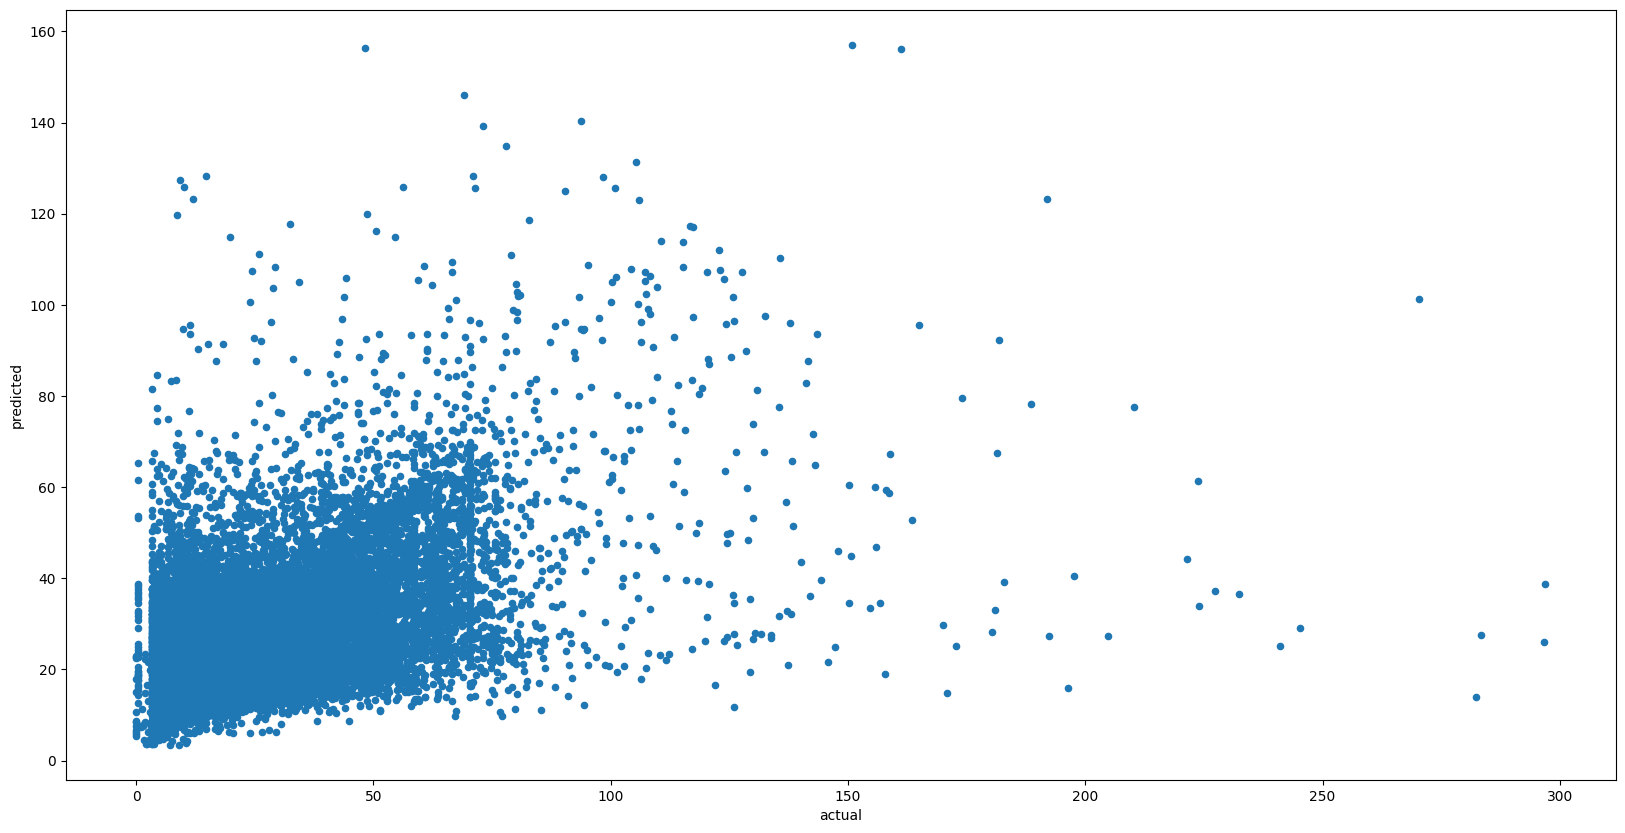

In [97]:
data = {'actual': y_test, 'predicted': y_pred}
results = pd.DataFrame(data)
results.plot(kind='scatter', x='actual', y='predicted', figsize=(20,10))

# Tuning Random Forest

### Hyperparameter tuning

- Random forrest gives a signifciant increase in the r-squared value
- Hyperparameter tuning is used to opitimse performance

In [106]:
import sklearn 
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

In [176]:
rf_random = {'n_estimators': [400, 600, 800],
                   'max_depth': [50, 100, 200, 300, None],
                   'min_samples_split': [5, 10, 20, 40],
                   'min_samples_leaf': [4, 10, 20],
                   'bootstrap': [True, False]}

In [181]:
rf = RandomForestRegressor()

rf_random_1 = RandomizedSearchCV(estimator = rf, cv=3, n_iter=10, param_distributions = rf_random, random_state=42, verbose=2 )

rf_random_1.fit(X_train, y_train)

rf_performances = pd.DataFrame.from_dict(rf_random_1.cv_results_)

In [178]:
rf_performances.sort_values('rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_depth,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
7,339.38,9.87,2.24,0.01,400,40,10,100,True,"{'n_estimators': 400, 'min_samples_split': 40,...",0.39,0.43,0.42,0.41,0.02,1
1,416.21,38.78,3.10,0.19,400,20,4,100,True,"{'n_estimators': 400, 'min_samples_split': 20,...",0.39,0.43,0.41,0.41,0.02,2
6,340.10,12.14,2.35,0.01,400,10,10,50,True,"{'n_estimators': 400, 'min_samples_split': 10,...",0.38,0.43,0.41,0.41,0.02,3
4,687.24,25.75,4.81,0.04,800,20,10,100,True,"{'n_estimators': 800, 'min_samples_split': 20,...",0.38,0.43,0.41,0.41,0.02,4
9,518.47,13.48,3.60,0.03,600,10,10,300,True,"{'n_estimators': 600, 'min_samples_split': 10,...",0.38,0.43,0.41,0.41,0.02,5
2,458.33,27.81,2.32,0.04,400,40,20,200,False,"{'n_estimators': 400, 'min_samples_split': 40,...",0.33,0.37,0.36,0.35,0.02,6
8,877.40,50.83,4.55,0.10,800,20,20,100,False,"{'n_estimators': 800, 'min_samples_split': 20,...",0.33,0.37,0.36,0.35,0.02,7
5,947.86,40.38,5.38,0.11,800,20,10,200,False,"{'n_estimators': 800, 'min_samples_split': 20,...",0.30,0.32,0.30,0.31,0.01,8
3,947.34,39.86,5.36,0.10,800,5,10,300,False,"{'n_estimators': 800, 'min_samples_split': 5, ...",0.30,0.32,0.30,0.31,0.01,9
0,1003.38,49.02,6.03,0.06,800,20,4,100,False,"{'n_estimators': 800, 'min_samples_split': 20,...",0.26,0.30,0.26,0.27,0.02,10


In [192]:
rf_grid = {'n_estimators': [600],
                   'max_depth': [200, 300, None],
                   'min_samples_split': [ 10, 20, 40],
                   'min_samples_leaf': [4, 10],
                   'bootstrap': [True]}

rf = RandomForestRegressor()

rf_grid = GridSearchCV(estimator=rf , param_grid=rf_grid, cv=3, verbose=2)

rf_grid.fit(X_train, y_train)
  

performances_rf_grid_search = pd.DataFrame.from_dict(rf_grid.cv_results_)

In [180]:
performances_rf_grid_search.sort_values('rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_bootstrap,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
14,557.26,18.56,3.82,0.05,True,None,4,40,600,"{'bootstrap': True, 'max_depth': None, 'min_sa...",0.39,0.43,0.42,0.42,0.02,1
2,540.04,16.68,3.81,0.01,True,200,4,40,600,"{'bootstrap': True, 'max_depth': 200, 'min_sam...",0.39,0.43,0.42,0.42,0.02,2
8,543.13,18.17,3.80,0.02,True,300,4,40,600,"{'bootstrap': True, 'max_depth': 300, 'min_sam...",0.39,0.43,0.42,0.42,0.02,3
17,508.80,17.35,3.43,0.14,True,None,10,40,600,"{'bootstrap': True, 'max_depth': None, 'min_sa...",0.39,0.43,0.42,0.41,0.02,4
5,506.64,17.10,3.33,0.01,True,200,10,40,600,"{'bootstrap': True, 'max_depth': 200, 'min_sam...",0.39,0.43,0.42,0.41,0.02,5
11,507.98,19.72,3.33,0.02,True,300,10,40,600,"{'bootstrap': True, 'max_depth': 300, 'min_sam...",0.39,0.43,0.42,0.41,0.02,6
7,550.04,17.18,4.06,0.03,True,300,4,20,600,"{'bootstrap': True, 'max_depth': 300, 'min_sam...",0.39,0.43,0.41,0.41,0.02,7
1,550.36,16.97,4.07,0.04,True,200,4,20,600,"{'bootstrap': True, 'max_depth': 200, 'min_sam...",0.39,0.43,0.41,0.41,0.02,8
13,2124.46,2190.18,4.23,0.15,True,None,4,20,600,"{'bootstrap': True, 'max_depth': None, 'min_sa...",0.39,0.43,0.41,0.41,0.02,9
16,520.81,14.55,3.59,0.03,True,None,10,20,600,"{'bootstrap': True, 'max_depth': None, 'min_sa...",0.38,0.43,0.41,0.41,0.02,10


# Gradient boosting

In [2]:
from sklearn.ensemble import GradientBoostingRegressor

gradient_model = GradientBoostingRegressor()
gradient_model.fit(X_train, y_train)

In [111]:
current_model = gradient_model
y_pred = current_model.predict(X_test)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

print('mean_absolute_error: ', mean_absolute_error(y_test, y_pred))
print('mean_squared_error: ', mean_squared_error(y_test, y_pred))
print('root_mean_squared_error: ', sqrt(mean_squared_error(y_test, y_pred)))
print('r2_score: ', r2_score(y_test, y_pred))

mean_absolute_error:  8.543249552661667
mean_squared_error:  200.29980469706618
root_mean_squared_error:  14.152731351123224
r2_score:  0.34423633026543443


<AxesSubplot: xlabel='actual', ylabel='predicted'>

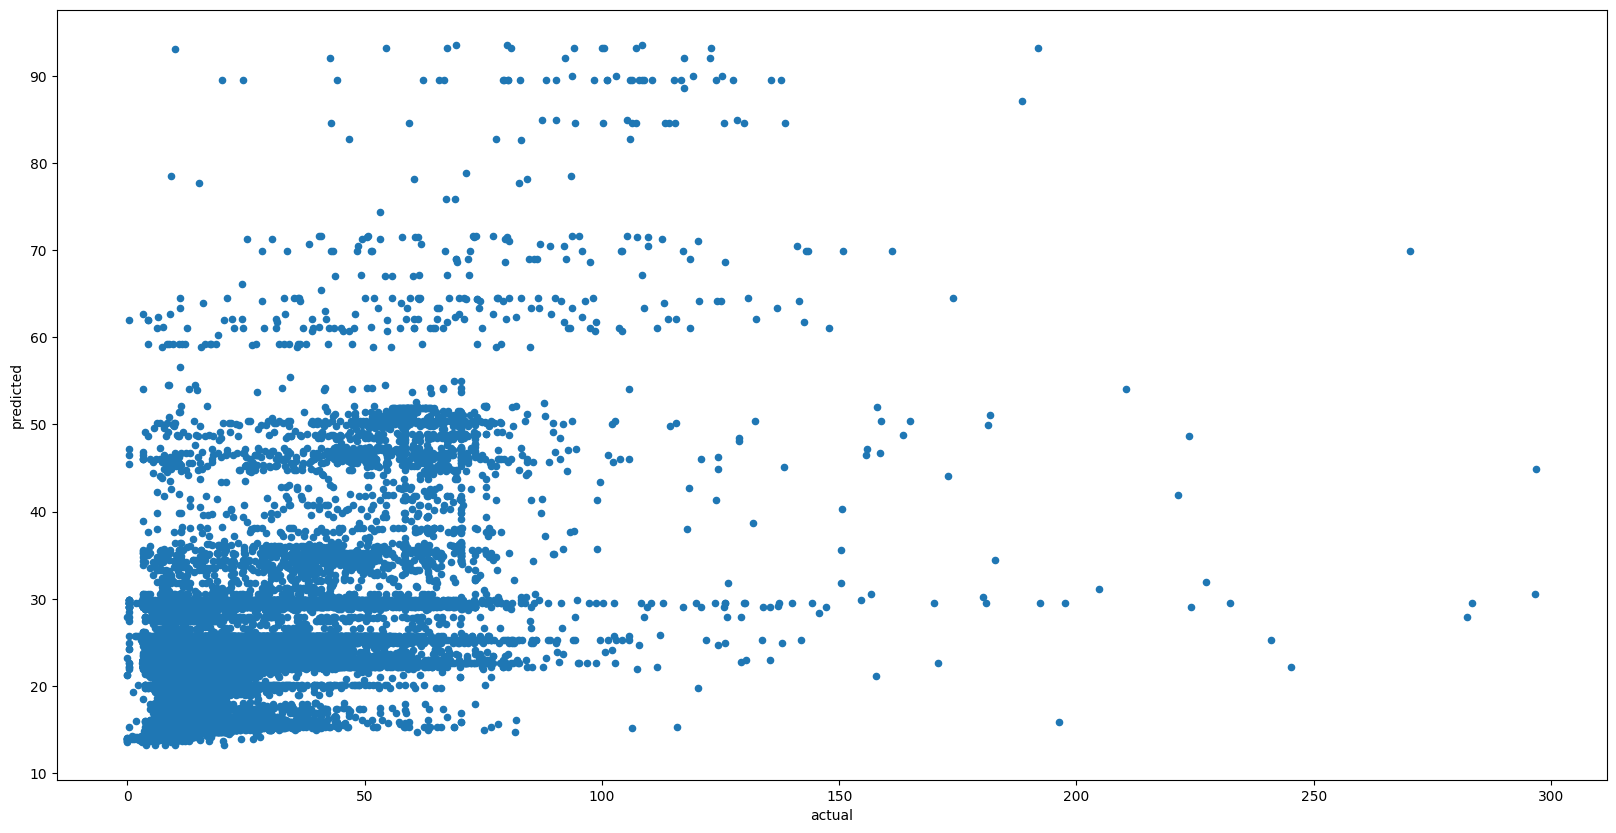

In [112]:
data = {'actual': y_test, 'predicted': y_pred}
results = pd.DataFrame(data)
results.plot(kind='scatter', x='actual', y='predicted', figsize=(20,10))

<AxesSubplot: >

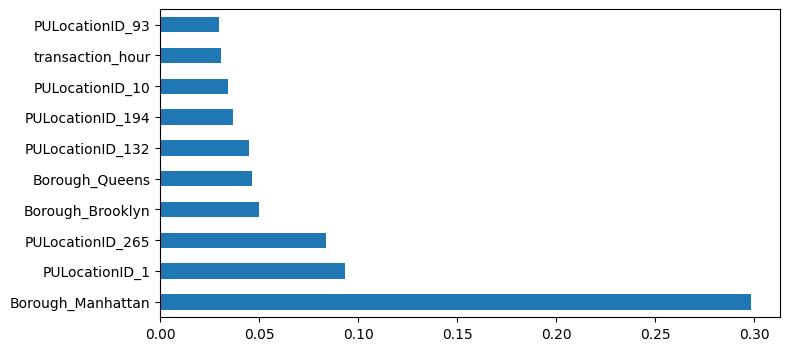

In [105]:
(pd.Series(current_model.feature_importances_, index=X_train.columns).nlargest(10)
.plot(kind='barh', figsize=(8,4))) 

# Tuning Gradient Boosting

### Hyperparameter tuning

- Gradient Boosting gives a signifciant increase in the r-squared value
- Hyperparameter tuning is used to opitimse performance

In [182]:
random_grid = {'loss':['squared_error', 'absolute_error'],
               'learning_rate':[ 0.001, 0.01, 0.1, 0.2],
               'n_estimators': [50, 100, 200, 400],
               'max_depth':  [10, 20, 50, 100, 200],
               'min_samples_split': [10, 20, 50, 100, 200],
               'min_samples_leaf': [10, 20, 50, 100, 200]}


from sklearn.model_selection import RandomizedSearchCV

gbr = GradientBoostingRegressor()

gbr_random = RandomizedSearchCV(estimator = gbr, param_distributions = random_grid, n_iter = 10, cv=3, verbose=2,  random_state=42)

gbr_random.fit(X_train, y_train)

performances_gb = pd.DataFrame.from_dict(gbr_random.cv_results_)

In [118]:
performances_gb.sort_values('rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_depth,param_loss,param_learning_rate,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
9,103.02,3.00,0.38,0.00,100,50,100,20,squared_error,0.10,"{'n_estimators': 100, 'min_samples_split': 50,...",0.39,0.42,0.42,0.41,0.02,1
4,167.61,2.91,0.82,0.01,200,50,20,20,squared_error,0.01,"{'n_estimators': 200, 'min_samples_split': 50,...",0.38,0.41,0.41,0.40,0.01,2
0,249.49,15.04,0.69,0.01,200,100,100,20,squared_error,0.20,"{'n_estimators': 200, 'min_samples_split': 100...",0.37,0.41,0.40,0.39,0.02,3
1,262.40,4.00,0.78,0.03,400,20,10,10,absolute_error,0.20,"{'n_estimators': 400, 'min_samples_split': 20,...",0.36,0.40,0.39,0.39,0.02,4
6,101.03,1.79,0.26,0.00,50,100,100,50,absolute_error,0.20,"{'n_estimators': 50, 'min_samples_split': 100,...",0.35,0.39,0.38,0.37,0.02,5
7,27.73,0.19,0.15,0.00,50,100,200,10,squared_error,0.20,"{'n_estimators': 50, 'min_samples_split': 100,...",0.35,0.38,0.38,0.37,0.02,6
3,169.98,0.48,0.84,0.01,200,100,200,50,squared_error,0.01,"{'n_estimators': 200, 'min_samples_split': 100...",0.34,0.38,0.37,0.36,0.02,7
5,196.98,0.75,0.90,0.00,400,100,200,10,squared_error,0.01,"{'n_estimators': 400, 'min_samples_split': 100...",0.34,0.38,0.37,0.36,0.02,8
8,192.90,1.26,0.75,0.01,200,200,20,20,absolute_error,0.01,"{'n_estimators': 200, 'min_samples_split': 200...",0.33,0.35,0.35,0.34,0.01,9
2,49.27,0.32,0.26,0.00,50,10,100,100,absolute_error,0.00,"{'n_estimators': 50, 'min_samples_split': 10, ...",-0.09,-0.11,-0.10,-0.10,0.01,10


In [183]:
grid_search = {'loss':['squared_error'],
               'learning_rate':[0.01, 0.05, 0.1],
               'n_estimators':[ 100, 150, 200] ,
               'max_depth':[20],
               'min_samples_split':[50],
               'min_samples_leaf':[50, 100]}

gbr_2 = GradientBoostingRegressor()

gbr_grid = GridSearchCV(estimator = gbr_2, param_grid=grid_search, cv=3, verbose=2)

gbr_grid.fit(X_train, y_train)

performances_gb_grid_search = pd.DataFrame.from_dict(gbr_grid.cv_results_)

In [129]:
performances_gb_grid_search.sort_values('rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_loss,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
6,94.18,0.56,0.41,0.01,0.05,squared_error,20,50,50,100,"{'learning_rate': 0.05, 'loss': 'squared_error...",0.40,0.43,0.42,0.42,0.02,1
7,153.96,1.41,0.56,0.02,0.05,squared_error,20,50,50,150,"{'learning_rate': 0.05, 'loss': 'squared_error...",0.39,0.44,0.42,0.42,0.02,2
8,216.16,1.51,0.71,0.01,0.05,squared_error,20,50,50,200,"{'learning_rate': 0.05, 'loss': 'squared_error...",0.39,0.43,0.42,0.42,0.02,3
12,112.07,3.03,0.40,0.02,0.10,squared_error,20,50,50,100,"{'learning_rate': 0.1, 'loss': 'squared_error'...",0.39,0.43,0.42,0.41,0.02,4
13,164.67,2.72,0.53,0.02,0.10,squared_error,20,50,50,150,"{'learning_rate': 0.1, 'loss': 'squared_error'...",0.39,0.43,0.42,0.41,0.01,5
9,92.72,3.94,0.43,0.01,0.05,squared_error,20,100,50,100,"{'learning_rate': 0.05, 'loss': 'squared_error...",0.39,0.43,0.42,0.41,0.02,6
10,147.98,2.16,0.60,0.03,0.05,squared_error,20,100,50,150,"{'learning_rate': 0.05, 'loss': 'squared_error...",0.39,0.43,0.42,0.41,0.02,7
11,209.23,4.60,0.80,0.13,0.05,squared_error,20,100,50,200,"{'learning_rate': 0.05, 'loss': 'squared_error...",0.39,0.42,0.42,0.41,0.02,8
15,105.54,1.00,0.39,0.00,0.10,squared_error,20,100,50,100,"{'learning_rate': 0.1, 'loss': 'squared_error'...",0.39,0.42,0.42,0.41,0.02,9
14,228.09,4.72,0.68,0.01,0.10,squared_error,20,50,50,200,"{'learning_rate': 0.1, 'loss': 'squared_error'...",0.39,0.42,0.41,0.41,0.01,10


# XGboost

In [3]:
import xgboost as xgb

xgb_model_benchmark = xgb.XGBRegressor()

xgb_model_benchmark.fit(X_train, y_train)

In [131]:
current_model = xgb_model_benchmark
y_pred = current_model.predict(X_test)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

print('mean_absolute_error: ', mean_absolute_error(y_test, y_pred))
print('mean_squared_error: ', mean_squared_error(y_test, y_pred))
print('root_mean_squared_error: ', sqrt(mean_squared_error(y_test, y_pred)))
print('r2_score: ', r2_score(y_test, y_pred))


mean_absolute_error:  7.6754206525496596
mean_squared_error:  188.00233719238713
root_mean_squared_error:  13.71139442917412
r2_score:  0.3844971404619608


### Hyperparameter tuning
- XGBoost gives a signifciant increase in the r-squared value
- Hyperparameter tuning is used to opitimse performance

In [160]:
xgb_random_grid = {
    "max_depth": [5, 20, 50],
    "n_estimators": [100, 200, 300],
    "gamma": [0, 0.1, 0.2],
    "learning_rate": [0.01, 0.1, 0.3],
    "reg_lambda": [0, 0.1, 1.0]
}

xgb_model = xgb.XGBRegressor()

xgb_random = RandomizedSearchCV(estimator=xgb_model, param_distributions=xgb_random_grid, n_iter=10, cv=3, verbose=0, random_state=42)

xgb_random.fit(X_train, y_train)

xgb_performances = pd.DataFrame.from_dict(xgb_random.cv_results_)

In [143]:
xgb_performances.sort_values('rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_reg_lambda,param_n_estimators,param_max_depth,param_learning_rate,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
9,13.63,0.31,0.42,0.00,1.00,200,5,0.10,0.10,"{'reg_lambda': 1.0, 'n_estimators': 200, 'max_...",0.38,0.42,0.41,0.40,0.01,1
1,19.01,0.39,0.43,0.01,0,300,5,0.01,0,"{'reg_lambda': 0, 'n_estimators': 300, 'max_de...",0.32,0.35,0.34,0.34,0.01,2
5,52.05,3.36,0.59,0.03,0.10,200,20,0.01,0.20,"{'reg_lambda': 0.1, 'n_estimators': 200, 'max_...",0.29,0.32,0.31,0.30,0.01,3
6,206.87,5.22,0.85,0.02,1.00,300,50,0.10,0.20,"{'reg_lambda': 1.0, 'n_estimators': 300, 'max_...",0.24,0.26,0.22,0.24,0.02,4
2,69.53,1.35,0.56,0.01,1.00,300,20,0.30,0.10,"{'reg_lambda': 1.0, 'n_estimators': 300, 'max_...",0.22,0.23,0.20,0.22,0.01,5
3,72.83,3.04,0.56,0.01,0.10,300,20,0.30,0.20,"{'reg_lambda': 0.1, 'n_estimators': 300, 'max_...",0.17,0.17,0.15,0.16,0.01,6
4,125.61,0.84,0.53,0.01,0.10,200,50,0.30,0.20,"{'reg_lambda': 0.1, 'n_estimators': 200, 'max_...",0.16,0.18,0.13,0.15,0.02,7
7,71.69,3.35,0.56,0.01,0,300,20,0.30,0.10,"{'reg_lambda': 0, 'n_estimators': 300, 'max_de...",0.12,0.14,0.11,0.13,0.01,8
0,300.24,12.05,1.75,0.09,0,300,50,0.01,0,"{'reg_lambda': 0, 'n_estimators': 300, 'max_de...",0.11,0.13,0.04,0.10,0.04,9
8,28.00,1.10,0.49,0.01,0,100,20,0.01,0,"{'reg_lambda': 0, 'n_estimators': 100, 'max_de...",0.08,0.10,0.11,0.10,0.01,10


In [161]:
grid_search = {
    "max_depth": [5,10,20],
    "n_estimators": [200, 300],
    "gamma": [0, 0.1, 0.2],
    "learning_rate": [0.1],
    "reg_lambda": [0, 0.1, 1.0]
}

xgb_model = xgb.XGBRegressor()

xgb_grid = GridSearchCV(estimator = xgb_model, param_grid=grid_search, cv=3, verbose=2)

xgb_grid.fit(X_train, y_train)

xgb_performances_grid_search = pd.DataFrame.from_dict(xgb_grid.cv_results_)

In [154]:
xgb_performances_grid_search.sort_values('rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_gamma,param_learning_rate,param_max_depth,param_n_estimators,param_reg_lambda,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
41,19.91,0.63,0.44,0.01,0.20,0.10,5,300,1.00,"{'gamma': 0.2, 'learning_rate': 0.1, 'max_dept...",0.39,0.42,0.41,0.41,0.01,1
5,19.16,0.24,0.42,0.00,0,0.10,5,300,1.00,"{'gamma': 0, 'learning_rate': 0.1, 'max_depth'...",0.39,0.42,0.41,0.41,0.01,2
23,20.19,0.41,0.43,0.01,0.10,0.10,5,300,1.00,"{'gamma': 0.1, 'learning_rate': 0.1, 'max_dept...",0.39,0.42,0.41,0.41,0.01,3
38,13.47,0.17,0.46,0.05,0.20,0.10,5,200,1.00,"{'gamma': 0.2, 'learning_rate': 0.1, 'max_dept...",0.38,0.42,0.41,0.40,0.01,4
20,13.26,0.40,0.41,0.00,0.10,0.10,5,200,1.00,"{'gamma': 0.1, 'learning_rate': 0.1, 'max_dept...",0.38,0.42,0.41,0.40,0.01,5
2,13.18,0.03,0.42,0.01,0,0.10,5,200,1.00,"{'gamma': 0, 'learning_rate': 0.1, 'max_depth'...",0.38,0.42,0.41,0.40,0.01,6
3,19.35,0.22,0.42,0.00,0,0.10,5,300,0,"{'gamma': 0, 'learning_rate': 0.1, 'max_depth'...",0.38,0.41,0.40,0.40,0.01,7
39,19.94,0.63,0.42,0.00,0.20,0.10,5,300,0,"{'gamma': 0.2, 'learning_rate': 0.1, 'max_dept...",0.38,0.41,0.40,0.40,0.01,8
21,19.03,0.10,0.42,0.01,0.10,0.10,5,300,0,"{'gamma': 0.1, 'learning_rate': 0.1, 'max_dept...",0.38,0.41,0.40,0.40,0.01,9
0,9.94,0.32,0.41,0.01,0,0.10,5,200,0,"{'gamma': 0, 'learning_rate': 0.1, 'max_depth'...",0.38,0.41,0.40,0.40,0.01,10


# Catboost

In [185]:
from catboost import CatBoostRegressor

model_cat = CatBoostRegressor()

model_cat.fit(X_train, y_train)

In [164]:
current_model = model_cat
y_pred = current_model.predict(X_test)

print('mean_absolute_error: ', mean_absolute_error(y_test, y_pred))
print('mean_squared_error: ', mean_squared_error(y_test, y_pred))
print('root_mean_squared_error: ', sqrt(mean_squared_error(y_test, y_pred)))
print('r2_score: ', r2_score(y_test, y_pred))


mean_absolute_error:  7.577893990823753
mean_squared_error:  180.4261961879544
root_mean_squared_error:  13.432281868243921
r2_score:  0.4093007494070978


### Hyperparameter tuning
- CatBoost gives a signifciant increase in the r-squared value
- Hyperparameter tuning is used to opitimse performance

In [184]:
cat_random_grid = {
    "iterations": [100, 200, 300],
    "learning_rate": [0.01, 0.05, 0.1],
    "depth": [5, 10, 20],
    "bagging_temperature": [0.1, 1, 5],
    "l2_leaf_reg": [1, 5, 20]
}

cat_model = CatBoostRegressor()

cat_random = RandomizedSearchCV(estimator=cat_model, param_distributions=cat_random_grid, n_iter=10, cv=3, verbose=2, random_state=42)

cat_random.fit(X_train, y_train)

cat_performances = pd.DataFrame.from_dict(cat_random.cv_results_)

In [170]:
cat_performances.sort_values('rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_l2_leaf_reg,param_iterations,param_depth,param_bagging_temperature,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
6,8.67,0.06,0.04,0.00,0.10,20,300,10,5,"{'learning_rate': 0.1, 'l2_leaf_reg': 20, 'ite...",0.38,0.42,0.41,0.41,0.02,1
9,3.03,0.03,0.04,0.00,0.10,5,100,10,1,"{'learning_rate': 0.1, 'l2_leaf_reg': 5, 'iter...",0.36,0.40,0.39,0.39,0.02,2
5,1.47,0.04,0.04,0.00,0.05,5,200,5,5,"{'learning_rate': 0.05, 'l2_leaf_reg': 5, 'ite...",0.35,0.38,0.38,0.37,0.02,3
0,1.93,0.05,0.04,0.00,0.01,20,300,5,0.10,"{'learning_rate': 0.01, 'l2_leaf_reg': 20, 'it...",0.29,0.32,0.32,0.31,0.01,4
8,1.61,0.29,0.04,0.00,0.01,1,200,5,0.10,"{'learning_rate': 0.01, 'l2_leaf_reg': 1, 'ite...",0.27,0.30,0.30,0.29,0.01,5
1,0.83,0.01,0.03,0.00,0.01,20,100,5,0.10,"{'learning_rate': 0.01, 'l2_leaf_reg': 20, 'it...",0.21,0.22,0.23,0.22,0.01,6
2,0.12,0.00,0.00,0.00,0.10,20,200,20,1,"{'learning_rate': 0.1, 'l2_leaf_reg': 20, 'ite...",NaN,NaN,NaN,NaN,NaN,7
3,0.12,0.01,0.00,0.00,0.05,20,200,20,5,"{'learning_rate': 0.05, 'l2_leaf_reg': 20, 'it...",NaN,NaN,NaN,NaN,NaN,7
4,0.12,0.01,0.00,0.00,0.05,5,300,20,5,"{'learning_rate': 0.05, 'l2_leaf_reg': 5, 'ite...",NaN,NaN,NaN,NaN,NaN,7
7,0.12,0.00,0.00,0.00,0.01,20,200,20,1,"{'learning_rate': 0.01, 'l2_leaf_reg': 20, 'it...",NaN,NaN,NaN,NaN,NaN,7


In [187]:
grid_search = {
    "iterations": [200, 300, 400],
    "learning_rate": [0.05, 0.1, 0.2],
    "depth": [10],
    "bagging_temperature": [0.1, 1, 5],
    "l2_leaf_reg": [1, 5,]
}


cat_model = CatBoostRegressor()

cat_grid = GridSearchCV(estimator = cat_model, param_grid=grid_search, cv=3, verbose=2)

cat_grid.fit(X_train, y_train)

cat_performances_grid_search = pd.DataFrame.from_dict(cat_grid.cv_results_)

In [174]:
cat_performances_grid_search.sort_values('rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_bagging_temperature,param_depth,param_iterations,param_l2_leaf_reg,param_learning_rate,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
52,11.62,0.30,0.12,0.09,5,10,400,5,0.10,"{'bagging_temperature': 5, 'depth': 10, 'itera...",0.40,0.43,0.42,0.41,0.01,1
34,11.62,0.77,0.05,0.01,1,10,400,5,0.10,"{'bagging_temperature': 1, 'depth': 10, 'itera...",0.40,0.43,0.42,0.41,0.01,1
16,11.06,0.05,0.05,0.00,0.10,10,400,5,0.10,"{'bagging_temperature': 0.1, 'depth': 10, 'ite...",0.40,0.43,0.42,0.41,0.01,1
46,8.75,0.13,0.05,0.00,5,10,300,5,0.10,"{'bagging_temperature': 5, 'depth': 10, 'itera...",0.39,0.43,0.41,0.41,0.01,4
28,8.74,0.04,0.05,0.00,1,10,300,5,0.10,"{'bagging_temperature': 1, 'depth': 10, 'itera...",0.39,0.43,0.41,0.41,0.01,4
10,8.34,0.02,0.05,0.00,0.10,10,300,5,0.10,"{'bagging_temperature': 0.1, 'depth': 10, 'ite...",0.39,0.43,0.41,0.41,0.01,4
23,5.96,0.09,0.05,0.00,1,10,200,5,0.20,"{'bagging_temperature': 1, 'depth': 10, 'itera...",0.39,0.43,0.41,0.41,0.01,7
41,5.71,0.03,0.05,0.00,5,10,200,5,0.20,"{'bagging_temperature': 5, 'depth': 10, 'itera...",0.39,0.43,0.41,0.41,0.01,7
5,5.62,0.02,0.04,0.00,0.10,10,200,5,0.20,"{'bagging_temperature': 0.1, 'depth': 10, 'ite...",0.39,0.43,0.41,0.41,0.01,7
48,12.48,0.36,0.06,0.00,5,10,400,1,0.05,"{'bagging_temperature': 5, 'depth': 10, 'itera...",0.39,0.42,0.41,0.41,0.01,10


# Final tuned models

In [204]:
tuned_random_forrest = RandomForestRegressor(n_estimators=400, min_samples_split=40, max_depth=100, min_samples_leaf=10, bootstrap=True)
tuned_gradient_boost = GradientBoostingRegressor(loss='squared_error', learning_rate=0.1, n_estimators=100, max_depth=20, min_samples_split=50, min_samples_leaf=100)
tuned_xgb_model = xgb.XGBRegressor(max_depth=5, n_estimators=300, gamma=0.2,learning_rate=0.1,reg_lambda=1)
tuned_cat_model = CatBoostRegressor(iterations=400, learning_rate=0.1, l2_leaf_reg=5, bagging_temperature=5, depth=10)

tuned_random_forrest.fit(X_train, y_train)
tuned_gradient_boost.fit(X_train, y_train)
tuned_xgb_model.fit(X_train, y_train)
tuned_cat_model.fit(X_train, y_train)

In [191]:
rf_preds = tuned_random_forrest.predict(X_test)
gb_preds = tuned_gradient_boost.predict(X_test)
xgb_preds = tuned_xgb_model.predict(X_test)
cat_preds = tuned_cat_model.predict(X_test)


In [203]:
print('r2_score for the benchmark decision tree model: ', r2_score(y_test_b, y_predict_benchmark))
print('r2_score for the tuned random forrest model: ', r2_score(y_test, rf_preds))
print('r2_score for the tuned gradient boost model: ', r2_score(y_test, gb_preds))
print('r2_score for the tuned xgboost model: ', r2_score(y_test, xgb_preds))
print('r2_score for the tuned catboost model: ', r2_score(y_test, cat_preds))


r2_score for the benchmarkk decision tree model:  0.1930055923265418
r2_score for the tuned random forrest model:  0.4044917050874487
r2_score for the tuned gradient boost model:  0.40038724552639526
r2_score for the tuned xgboost model:  0.392388074860619
r2_score for the tuned catboost model:  0.404374203434802
